<a href="https://colab.research.google.com/github/AdriiTrujillo/Fault_Tolerance_Colabs/blob/main/Training%26Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP FORWARD NEURAL NETWORK

In [2]:
# Imports y permisos

%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np
import re
import sys

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, files
from oauth2client.client import GoogleCredentials

from keras.constraints import maxnorm
from keras.models import Sequential
from keras.models import load_model, Model
from keras.models import model_from_json
from keras.layers import Dense, Dropout, Activation, Input
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from keras import applications
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## RED1 EXTREMOS

### DATOS ENTRENAMIENTO


In [4]:
# Obtención de los datasets de entrenamiento 
bubblesort_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/bubblesort-score.csv'
dijkstra_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/dijstra-score.csv'
ndes_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/ndes-score.csv'


bubblesort_df = pd.read_csv(bubblesort_path, sep=";")
print("bubblesort_df: ", bubblesort_df.shape)

dijkstra_df = pd.read_csv(dijkstra_path, sep=";")
print("dijkstra_df: ", dijkstra_df.shape)

ndes_df = pd.read_csv(ndes_path, sep=";")
print("ndes_df: ", ndes_df.shape)

# Obtención de los datos de entrenamiento

bubblesort_Xdata = bubblesort_df[["time", "size"]].values
bubblesort_Ydata = bubblesort_df[["hang", "sdc"]].values

print("bubblesort_Xdata: ", bubblesort_Xdata.shape)

dijkstra_Xdata = dijkstra_df[["time", "size"]].values
dijkstra_Ydata = dijkstra_df[["hang", "sdc"]].values

print("dijkstra_Xdata: ", dijkstra_Xdata.shape)

ndes_Xdata = ndes_df[["time", "size"]].values
ndes_Ydata = ndes_df[["hang", "sdc"]].values

print("ndes_Xdata: ", ndes_Xdata.shape)

x_data = np.concatenate((bubblesort_Xdata, dijkstra_Xdata, ndes_Xdata), axis=0)
y_data = np.concatenate((bubblesort_Ydata, dijkstra_Ydata, ndes_Ydata), axis=0)

# Escalado de los datos utilizados 
y_data = y_data/100 # Se deja en tanto por 1 [0,1)
scaler = preprocessing.StandardScaler() #Values with mean=0 and standard deviation=1
x_data = scaler.fit_transform(x_data) 

print("x_data: ", x_data.shape)
print("y_data: ", y_data.shape)

bubblesort_df:  (686, 6)
dijkstra_df:  (92, 6)
ndes_df:  (592, 6)
bubblesort_Xdata:  (686, 2)
dijkstra_Xdata:  (92, 2)
ndes_Xdata:  (592, 2)
x_data:  (1370, 2)
y_data:  (1370, 2)


### DATOS DE TEST

In [5]:
# Obtención de los datasets de test
bubblesort_test_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/bubblesort-test.csv'
dijkstra_test_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/dijstra-test.csv'
ndes_test_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/ndes-test.csv'

bubblesort_test_df = pd.read_csv(bubblesort_test_path, sep=";")
print("bubblesort_test_df: ", bubblesort_test_df.shape)

dijkstra_test_df = pd.read_csv(dijkstra_test_path, sep=";")
print("dijkstra_test_df: ", dijkstra_test_df.shape)

ndes_test_df = pd.read_csv(ndes_test_path, sep=";")
print("ndes_test_df: ", ndes_test_df.shape)

# Obtención de los datos de test

bubblesort_test_Xdata = bubblesort_test_df[["time", "size"]].values
bubblesort_test_Ydata = bubblesort_test_df[["hang", "sdc"]].values

print("bubblesort_test_Xdata: ", bubblesort_test_Xdata.shape)

dijkstra_test_Xdata = dijkstra_test_df[["time", "size"]].values
dijkstra_test_Ydata = dijkstra_test_df[["hang", "sdc"]].values

print("dijkstra_test_Xdata: ", dijkstra_test_Xdata.shape)

ndes_test_Xdata = ndes_test_df[["time", "size"]].values
ndes_test_Ydata = ndes_test_df[["hang", "sdc"]].values

print("ndes_test_Xdata: ", ndes_test_Xdata.shape)

x_test = np.concatenate((bubblesort_test_Xdata, dijkstra_test_Xdata, ndes_test_Xdata), axis=0)
y_test = np.concatenate((bubblesort_test_Ydata, dijkstra_test_Ydata, ndes_test_Ydata), axis=0)

# Se realiza un escalado de los datos
y_test = y_test/100 # datos en tanto por 1 [0,1)
scaler = preprocessing.StandardScaler() #Values with mean=0 and standard deviation=1
x_test = scaler.fit_transform(x_test)

print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

bubblesort_test_df:  (123, 6)
dijkstra_test_df:  (16, 6)
ndes_test_df:  (107, 6)
bubblesort_test_Xdata:  (123, 2)
dijkstra_test_Xdata:  (16, 2)
ndes_test_Xdata:  (107, 2)
x_test:  (246, 2)
y_test:  (246, 2)


### ENTRENAMIENTO NORMAL

In [ ]:
# Declarar el modelo a utilizar antes de correr esta celda
model = nn_model2()
model.fit(x=x_data, y=y_data, validation_data=(x_test, y_test), batch_size=16, epochs=400, verbose=2)
pesos = 'red1_extremos.hdf5'
model.save_weights(pesos)
 
# Resultado de la red para ver que tal ha funcionado el entrenamiento
scores = model.evaluate(x_test, y_test, verbose=0)
print("Precision: ", scores[1]*100, "%")
print("Error medio absoluto: ", scores[0])

In [10]:
# Correr esta celda para guardar los pesos en la carpeta del Drive
import shutil
save_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Redes Entrenadas'
 
ruta = shutil.move(pesos, save_path)

### ENTRENAMIENTO CUSTOM

In [ ]:
# Declarar el modelo a utilizar antes de correr esta celda
# Con los parametros optimizados

model = # MODELO NUEVO AQUÍ                                           
model.fit(x=x_data, y=y_data, validation_data=(x_test, y_test), batch_size=16, epochs= """ EPOCAS NUEVAS AQUÍ """ , verbose=2)
pesos = 'red1_extremos_custom.hdf5'
model.save_weights(pesos)
 
# Resultado de la red para ver que tal ha funcionado el entrenamiento
scores = model.evaluate(x_test, y_test, verbose=0)
print("Precision: ", scores[1]*100, "%")
print("Error medio absoluto: ", scores[0])

In [ ]:
# Correr esta celda para guardar los pesos en la carpeta del Drive
import shutil
save_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Redes Entrenadas'
 
ruta = shutil.move(pesos, save_path)

### EVALUACIÓN

In [11]:
nn_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Redes Entrenadas/red1_extremos.hdf5'

# Declarar el modelo a utilizar antes de correr esta celda
model = nn_model()
model.load_weights(nn_path)

# Correr la red nueronal
print('Corriendo la red ... ')
scores = model.evaluate(x_test, y_test, verbose=0)
print("Precision: ", scores[1]*100, "%")
print("Error medio absoluto: ", scores[0])

Corriendo la red ... 
Precision:  90.65040946006775 %
Error medio absoluto:  0.014894504100084305


In [12]:
# Resultados [SDC, HANG] que obtiene la red para las entradas dadas
y_predict = model.predict(x_test)

# Error absoluto de las predicciones 
errores = np.abs(y_test-model.predict(x_test))

# Error medio absoluto obtenido en las predicciones 
mean_error = np.abs(y_test-model.predict(x_test)).mean(axis=0)

# Caulcular los resultados para UnAce
unAce_predict = 1 - (y_predict[:,0] + y_predict[:,1])
unAce_real = 1 - (y_test[:,0] + y_test[:,1])

unAce_error = np.abs(unAce_real - unAce_predict)
unAce_MAE = np.abs(unAce_real - unAce_predict).mean(axis=0)

print('Error medio absoluto (FT) :')
print('SDC -->', mean_error[0])
print('HANG -->', mean_error[1])
print('UnAce -->', unAce_MAE)

Error medio absoluto (FT) :
SDC --> 0.014262375741822401
HANG --> 0.01552663199698697
UnAce --> 0.005688799046781036


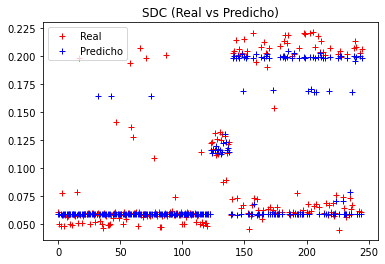

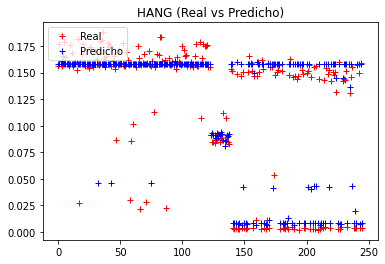

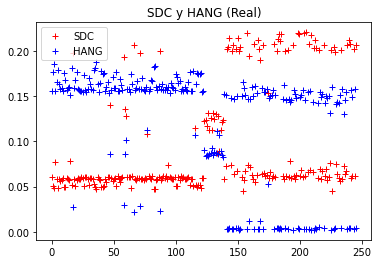

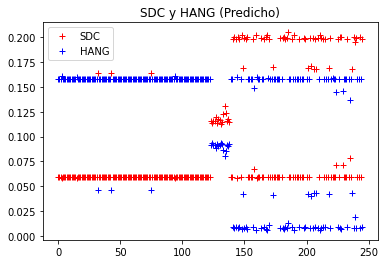

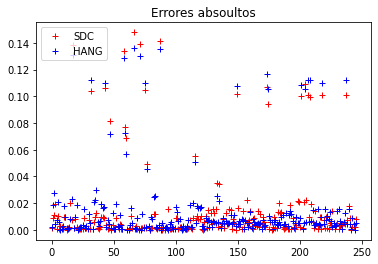

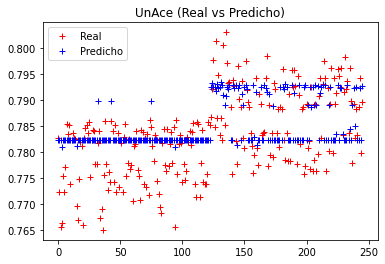

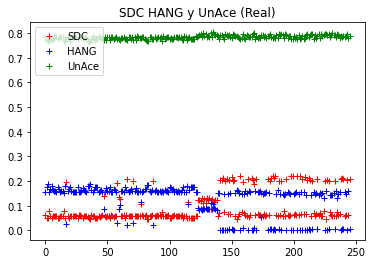

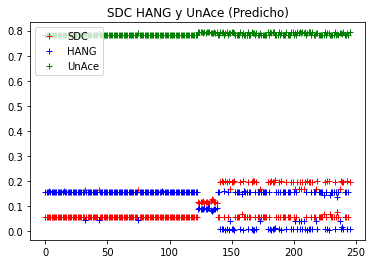

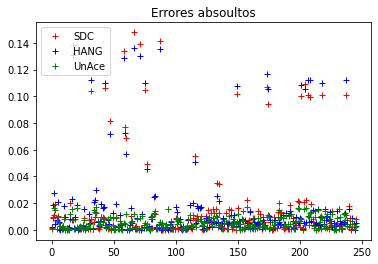

In [19]:
# Dibuja todas las graficas de los datos de HANG y SDC
dibujar_Graficas(y_predict, y_test, errores)
# Dibuja todas las graficas de los datos de unAce
graficas_UnAce(y_predict, y_test, errores, unAce_real, unAce_predict, unAce_error)

### GUARDADO DE LOS RESULTADOS

In [23]:
results_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Resultados/'

csv = 'red1_extremos.csv' # ENTRADA DEL USUARIO
with open(results_path + csv, "w") as f:
  f.write('SDC_Real;HANG_Real;UnAce_Real;SDC_Predicho;HANG_Predicho;UnAce_Predicho;error_SDC;error_HANG;error_UnAce\n')
  f.close()

string = ""

for i in range(y_test.shape[0]):
  string += (str(y_test[i,0]) + ";" + str(y_test[i,1]) + ";" + str(unAce_real[i]) + ";"
            + str(y_predict[i,0]) + ";" + str(y_predict[i,1]) + ";" + str(unAce_predict[i]) + ";"
            + str(errores[i,0]) + ";" + str(errores[i,1]) + ";" + str(unAce_error[i]) + "\n")
  
  
with open(results_path + csv, "a") as f:
  f.write(string)
  f.close()
  

## RED2 EXTREMOS

### DATOS ENTRENAMIENTO


In [24]:
# Obtención de los datasets de entrenamiento 
bubblesort_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/bubblesort-score.csv'
ndes_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/ndes-score.csv'

bubblesort_df = pd.read_csv(bubblesort_path, sep=";")
print("bubblesort_df: ", bubblesort_df.shape)

ndes_df = pd.read_csv(ndes_path, sep=";")
print("ndes_df: ", ndes_df.shape)

# Obtención de los datos de entrenamiento

bubblesort_Xdata = bubblesort_df[["time", "size"]].values
bubblesort_Ydata = bubblesort_df[["hang", "sdc"]].values

print("bubblesort_Xdata: ", bubblesort_Xdata.shape)

ndes_Xdata = ndes_df[["time", "size"]].values
ndes_Ydata = ndes_df[["hang", "sdc"]].values

print("ndes_Xdata: ", ndes_Xdata.shape)

x_data = np.concatenate((bubblesort_Xdata, ndes_Xdata), axis=0)
y_data = np.concatenate((bubblesort_Ydata, ndes_Ydata), axis=0)

# Escalado de los datos utilizados 
y_data = y_data/100 # Se deja en tanto por 1 [0,1)
scaler = preprocessing.StandardScaler() #Values with mean=0 and standard deviation=1
x_data = scaler.fit_transform(x_data) 

print("x_data: ", x_data.shape)
print("y_data: ", y_data.shape)

bubblesort_df:  (686, 6)
ndes_df:  (592, 6)
bubblesort_Xdata:  (686, 2)
ndes_Xdata:  (592, 2)
x_data:  (1278, 2)
y_data:  (1278, 2)


### DATOS DE TEST

In [31]:
# Obtención de los datasets de test
dijkstra_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/dijkstra_full.csv'

dijkstra_df = pd.read_csv(dijkstra_path, sep=";")
print("dijkstra_df: ", dijkstra_df.shape)

# Para obtener el dataset de test se debe indicar un porcentaje del tamaño total (112)
porcentaje_ind = 75 # Entrada del usuario (Porcentaje)
num_ind = (len(dijkstra_df)*porcentaje_ind)//100
print("El numero de individuos para la realización de test son: ", num_ind)

dijkstra_test_df = dijkstra_df.sample(num_ind).reset_index(drop=True)

print("Tamaño del dataset de Test: ", dijkstra_test_df.shape)

# Obtención de los datos de test
dijkstra_test_Xdata = dijkstra_test_df[["time", "size"]].values
dijkstra_test_Ydata = dijkstra_test_df[["hang", "sdc"]].values

print("dijkstra_test_Xdata: ", dijkstra_test_Xdata.shape)

x_test = dijkstra_test_Xdata;
y_test = dijkstra_test_Ydata;

# Se realiza un escalado de los datos
y_test = y_test/100 # datos en tanto por 1 [0,1)
scaler = preprocessing.StandardScaler() #Values with mean=0 and standard deviation=1
x_test = scaler.fit_transform(x_test)

print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

dijkstra_df:  (112, 6)
El numero de individuos para la realización de test son:  84
Tamaño del dataset de Test:  (84, 6)
dijkstra_test_Xdata:  (84, 2)
x_test:  (84, 2)
y_test:  (84, 2)


### ENTRENAMIENTO NORMAL

In [ ]:
# Declarar el modelo a utilizar antes de correr esta celda
model = nn_model2()
model.fit(x=x_data, y=y_data, validation_data=(x_test, y_test), batch_size=16, epochs=400, verbose=2)
pesos = 'red2_extremos.hdf5'
model.save_weights(pesos)

# Resultado de la red para ver que tal ha funcionado el entrenamiento
scores = model.evaluate(x_test, y_test, verbose=0)
print("Precision: ", scores[1]*100, "%")
print("Error medio absoluto: ", scores[0])

In [33]:
# Correr esta celda para guardar los pesos en la carpeta del Drive
import shutil
save_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Redes Entrenadas'
 
ruta = shutil.move(pesos, save_path)

### ENTRENAMIENTO CUSTOM

In [ ]:
# Declarar el modelo a utilizar antes de correr esta celda
# Con los parametros optimizados

model = # MODELO NUEVO AQUÍ                                           
model.fit(x=x_data, y=y_data, validation_data=(x_test, y_test), batch_size=16, epochs= """ EPOCAS NUEVAS AQUÍ """ , verbose=2)
pesos = 'red1_extremos_custom.hdf5'
model.save_weights(pesos)
 
# Resultado de la red para ver que tal ha funcionado el entrenamiento
scores = model.evaluate(x_test, y_test, verbose=0)
print("Precision: ", scores[1]*100, "%")
print("Error medio absoluto: ", scores[0])

In [ ]:
# Correr esta celda para guardar los pesos en la carpeta del Drive
import shutil
save_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Redes Entrenadas'
 
ruta = shutil.move(pesos, save_path)

### EVALUACIÓN

In [34]:
nn_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Redes Entrenadas/red2_extremos.hdf5'

# Declarar el modelo a utilizar antes de correr esta celda
model = nn_model()
model.load_weights(nn_path)

# Correr la red nueronal
print('Corriendo la red ... ')
scores = model.evaluate(x_test, y_test, verbose=0)
print("Precision: ", scores[1]*100, "%")
print("Error medio absoluto: ", scores[0])

Corriendo la red ... 
Precision:  34.52380895614624 %
Error medio absoluto:  0.06598719954490662


In [35]:
# Resultados [SDC, HANG] que obtiene la red para las entradas dadas
y_predict = model.predict(x_test)

# Error absoluto de las predicciones 
errores = np.abs(y_test-model.predict(x_test))

# Error medio absoluto obtenido en las predicciones 
mean_error = np.abs(y_test-model.predict(x_test)).mean(axis=0)

# Caulcular los resultados para UnAce
unAce_predict = 1 - (y_predict[:,0] + y_predict[:,1])
unAce_real = 1 - (y_test[:,0] + y_test[:,1])

unAce_error = np.abs(unAce_real - unAce_predict)
unAce_MAE = np.abs(unAce_real - unAce_predict).mean(axis=0)

print('Error medio absoluto (FT) :')
print('SDC -->', mean_error[0])
print('HANG -->', mean_error[1])
print('UnAce -->', unAce_MAE)

Error medio absoluto (FT) :
SDC --> 0.06228382667595327
HANG --> 0.06969058755038031
UnAce --> 0.0108575885762135


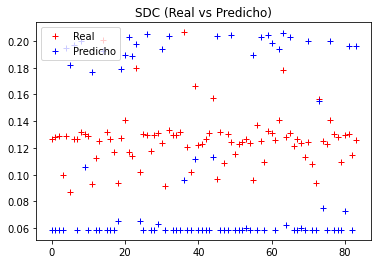

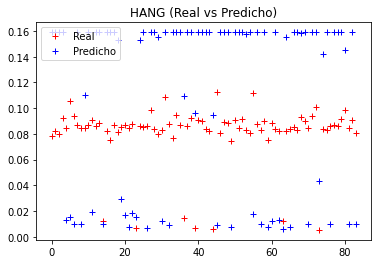

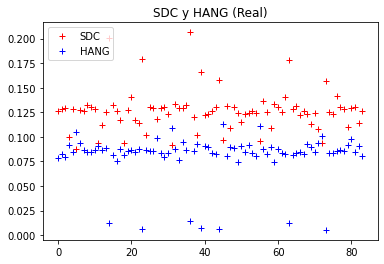

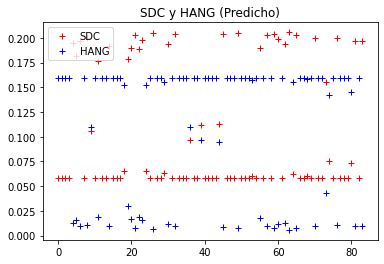

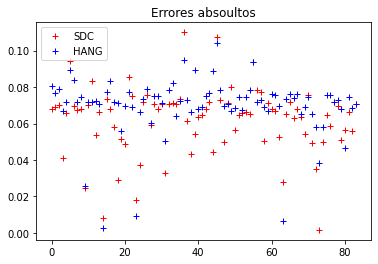

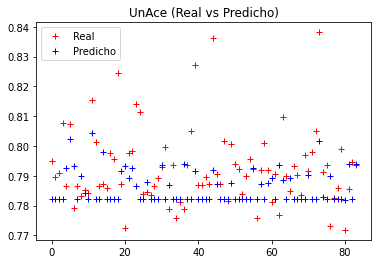

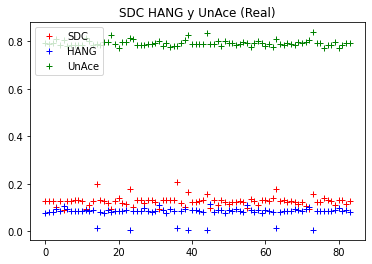

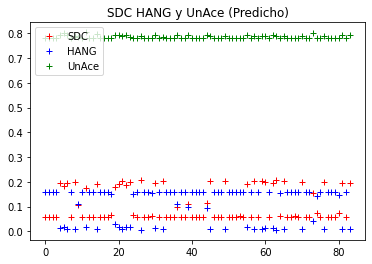

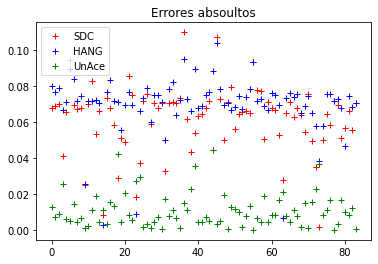

In [36]:
# Dibuja todas las graficas de los datos de HANG y SDC
dibujar_Graficas(y_predict, y_test, errores)
# Dibuja todas las graficas de los datos de unAce
graficas_UnAce(y_predict, y_test, errores, unAce_real, unAce_predict, unAce_error)

### GUARDADO DE LOS RESULTADOS

In [37]:
results_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Resultados/'

csv = 'red2_extremos.csv' # ENTRADA DEL USUARIO
with open(results_path + csv, "w") as f:
  f.write('SDC_Real;HANG_Real;UnAce_Real;SDC_Predicho;HANG_Predicho;UnAce_Predicho;error_SDC;error_HANG;error_UnAce\n')
  f.close()

string = ""

for i in range(y_test.shape[0]):
  string += (str(y_test[i,0]) + ";" + str(y_test[i,1]) + ";" + str(unAce_real[i]) + ";"
            + str(y_predict[i,0]) + ";" + str(y_predict[i,1]) + ";" + str(unAce_predict[i]) + ";"
            + str(errores[i,0]) + ";" + str(errores[i,1]) + ";" + str(unAce_error[i]) + "\n")
  
  
with open(results_path + csv, "a") as f:
  f.write(string)
  f.close()
  

## RED1 ORIGINAL

### DATOS ENTRENAMIENTO


In [39]:
# Obtención de los datasets de entrenamiento 
bubblesort_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/bubblesort_full.csv'
dijkstra_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/dijkstra_full.csv'
ndes_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/ndes_full.csv'

bubblesort_df = pd.read_csv(bubblesort_path, sep=";")
print("bubblesort_df: ", bubblesort_df.shape)

dijkstra_df = pd.read_csv(dijkstra_path, sep=";")
print("dijkstra_df: ", dijkstra_df.shape)

ndes_df = pd.read_csv(ndes_path, sep=";")
print("ndes_df: ", ndes_df.shape)

# Obtención de los datos de entrenamiento

bubblesort_Xdata = bubblesort_df[["time", "size"]].values
bubblesort_Ydata = bubblesort_df[["hang", "sdc"]].values

print("bubblesort_Xdata: ", bubblesort_Xdata.shape)

dijkstra_Xdata = dijkstra_df[["time", "size"]].values
dijkstra_Ydata = dijkstra_df[["hang", "sdc"]].values

print("dijkstra_Xdata: ", dijkstra_Xdata.shape)

ndes_Xdata = ndes_df[["time", "size"]].values
ndes_Ydata = ndes_df[["hang", "sdc"]].values

print("ndes_Xdata: ", ndes_Xdata.shape)

x_data = np.concatenate((bubblesort_Xdata, dijkstra_Xdata, ndes_Xdata), axis=0)
y_data = np.concatenate((bubblesort_Ydata, dijkstra_Ydata, ndes_Ydata), axis=0)

# Escalado de los datos utilizados 
y_data = y_data/100 # Se deja en tanto por 1 [0,1)
scaler = preprocessing.StandardScaler() #Values with mean=0 and standard deviation=1
x_data = scaler.fit_transform(x_data) 

print("x_data: ", x_data.shape)
print("y_data: ", y_data.shape)

bubblesort_df:  (824, 6)
dijkstra_df:  (112, 6)
ndes_df:  (718, 6)
bubblesort_Xdata:  (824, 2)
dijkstra_Xdata:  (112, 2)
ndes_Xdata:  (718, 2)
x_data:  (1654, 2)
y_data:  (1654, 2)


### DATOS DE TEST

In [40]:
# Se separan los datasets de entrenamiento completos en 90% training y 10% test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=0, shuffle=True)



### ENTRENAMIENTO

In [41]:
# Declarar el modelo a utilizar antes de correr esta celda
model = nn_model2()
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=16, epochs=400, verbose=2)
pesos = 'red1_original.hdf5'
model.save_weights(pesos)

# Resultado de la red para ver que tal ha funcionado el entrenamiento
scores = model.evaluate(x_test, y_test, verbose=0)
print("Precision: ", scores[1]*100, "%")
print("Error medio absoluto: ", scores[0])

Epoch 1/400
93/93 - 2s - loss: 0.2824 - accuracy: 0.5612 - val_loss: 0.0647 - val_accuracy: 0.8434
Epoch 2/400
93/93 - 0s - loss: 0.0902 - accuracy: 0.6358 - val_loss: 0.0528 - val_accuracy: 0.6687
Epoch 3/400
93/93 - 0s - loss: 0.0592 - accuracy: 0.6855 - val_loss: 0.0520 - val_accuracy: 0.6687
Epoch 4/400
93/93 - 0s - loss: 0.0525 - accuracy: 0.6989 - val_loss: 0.0514 - val_accuracy: 0.6687
Epoch 5/400
93/93 - 0s - loss: 0.0515 - accuracy: 0.6875 - val_loss: 0.0514 - val_accuracy: 0.6687
Epoch 6/400
93/93 - 0s - loss: 0.0499 - accuracy: 0.6821 - val_loss: 0.0520 - val_accuracy: 0.6687
Epoch 7/400
93/93 - 0s - loss: 0.0480 - accuracy: 0.6983 - val_loss: 0.0514 - val_accuracy: 0.6687
Epoch 8/400
93/93 - 0s - loss: 0.0471 - accuracy: 0.6929 - val_loss: 0.0476 - val_accuracy: 0.6687
Epoch 9/400
93/93 - 0s - loss: 0.0458 - accuracy: 0.7050 - val_loss: 0.0454 - val_accuracy: 0.7410
Epoch 10/400
93/93 - 0s - loss: 0.0458 - accuracy: 0.7036 - val_loss: 0.0468 - val_accuracy: 0.6627
Epoch 11/

In [42]:
# Correr esta celda para guardar los pesos en la carpeta del Drive
import shutil
save_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Redes Entrenadas'

ruta = shutil.move(pesos, save_path)

### EVALUACIÓN

In [43]:
nn_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Redes Entrenadas/red1_original.hdf5'

# Declarar el modelo a utilizar antes de correr esta celda
model = nn_model()
model.load_weights(nn_path)

# Correr la red nueronal
print('Corriendo la red ... ')
scores = model.evaluate(x_test, y_test, verbose=0)
print("Precision: ", scores[1]*100, "%")
print("Error medio absoluto: ", scores[0])

Corriendo la red ... 
Precision:  91.56626462936401 %
Error medio absoluto:  0.01842350699007511


In [44]:
# Resultados [SDC, HANG] que obtiene la red para las entradas dadas
y_predict = model.predict(x_test)

# Error absoluto de las predicciones 
errores = np.abs(y_test-model.predict(x_test))

# Error medio absoluto obtenido en las predicciones 
mean_error = np.abs(y_test-model.predict(x_test)).mean(axis=0)

# Caulcular los resultados para UnAce
unAce_predict = 1 - (y_predict[:,0] + y_predict[:,1])
unAce_real = 1 - (y_test[:,0] + y_test[:,1])

unAce_error = np.abs(unAce_real - unAce_predict)
unAce_MAE = np.abs(unAce_real - unAce_predict).mean(axis=0)

print('Error medio absoluto (FT) :')
print('SDC -->', mean_error[0])
print('HANG -->', mean_error[1])
print('UnAce -->', unAce_MAE)

Error medio absoluto (FT) :
SDC --> 0.01735376199086488
HANG --> 0.019493254698320656
UnAce --> 0.009935918757561007


In [ ]:
# Dibuja todas las graficas de los datos de HANG y SDC
dibujar_Graficas(y_predict, y_test, errores)
# Dibuja todas las graficas de los datos de unAce
graficas_UnAce(y_predict, y_test, errores, unAce_real, unAce_predict, unAce_error)

### GUARDADO DE LOS RESULTADOS

In [45]:
results_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Resultados/'

csv = 'red1_original.csv' # ENTRADA DEL USUARIO

with open(results_path + csv, "w") as f:
  f.write('SDC_Real;HANG_Real;UnAce_Real;SDC_Predicho;HANG_Predicho;UnAce_Predicho;error_SDC;error_HANG;error_UnAce\n')
  f.close()

string = ""

for i in range(y_test.shape[0]):
  string += (str(y_test[i,0]) + ";" + str(y_test[i,1]) + ";" + str(unAce_real[i]) + ";"
            + str(y_predict[i,0]) + ";" + str(y_predict[i,1]) + ";" + str(unAce_predict[i]) + ";"
            + str(errores[i,0]) + ";" + str(errores[i,1]) + ";" + str(unAce_error[i]) + "\n")
  
  
with open(results_path + csv, "a") as f:
  f.write(string)
  f.close()
  

## RED2 ORIGINAL

### DATOS ENTRENAMIENTO


In [47]:
# Obtención de los datasets de entrenamiento 
bubblesort_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/bubblesort_full.csv'
ndes_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/ndes_full.csv'

bubblesort_df = pd.read_csv(bubblesort_path, sep=";")
print("bubblesort_df: ", bubblesort_df.shape)

ndes_df = pd.read_csv(ndes_path, sep=";")
print("ndes_df: ", ndes_df.shape)

full_df = pd.concat([bubblesort_df, ndes_df])
print("full_df: ", full_df.shape)

# Para obtener el dataset de test se debe indicar un porcentaje del tamaño total (~ 1542)
porcentaje_ind = 75 # Entrada del usuario (Porcentaje)
num_ind = (len(full_df)*porcentaje_ind)//100
print("El numero de individuos para la realización de test son: ", num_ind)

final_df = full_df.sample(num_ind).reset_index(drop=True)


# Obtención de los datos de entrenamiento

final_Xdata = final_df[["time", "size"]].values
final_Ydata = final_df[["hang", "sdc"]].values

print("final_Xdata: ", bubblesort_Xdata.shape)

x_data = final_Xdata
y_data = final_Ydata

# Escalado de los datos utilizados 
y_data = y_data/100 # Se deja en tanto por 1 [0,1)
scaler = preprocessing.StandardScaler() #Values with mean=0 and standard deviation=1
x_data = scaler.fit_transform(x_data) 

print("x_data: ", x_data.shape)
print("y_data: ", y_data.shape)

bubblesort_df:  (824, 6)
ndes_df:  (718, 6)
full_df:  (1542, 6)
El numero de individuos para la realización de test son:  1156
final_Xdata:  (824, 2)
x_data:  (1156, 2)
y_data:  (1156, 2)


### DATOS DE TEST

In [49]:
# Obtención de los datasets de test
dijkstra_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Data Frames/TAREA_2/dijkstra_full.csv'

dijkstra_df = pd.read_csv(dijkstra_path, sep=";")
print("dijkstra_df: ", dijkstra_df.shape)

# Para obtener el dataset de test se debe indicar un porcentaje del tamaño total (112)
porcentaje_ind = 75 # Entrada del usuario (Porcentaje)
num_ind = (len(dijkstra_df)*porcentaje_ind)//100
print("El numero de individuos para la realización de test son: ", num_ind)

dijkstra_test_df = dijkstra_df.sample(num_ind).reset_index(drop=True)

print("Tamaño del dataset de Test: ", dijkstra_test_df.shape)

# Obtención de los datos de test
dijkstra_test_Xdata = dijkstra_test_df[["time", "size"]].values
dijkstra_test_Ydata = dijkstra_test_df[["hang", "sdc"]].values

print("dijkstra_test_Xdata: ", dijkstra_test_Xdata.shape)

x_test = dijkstra_test_Xdata;
y_test = dijkstra_test_Ydata;

# Se realiza un escalado de los datos
y_test = y_test/100 # datos en tanto por 1 [0,1)
scaler = preprocessing.StandardScaler() #Values with mean=0 and standard deviation=1
x_test = scaler.fit_transform(x_test)

print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)

dijkstra_df:  (112, 6)
El numero de individuos para la realización de test son:  84
Tamaño del dataset de Test:  (84, 6)
dijkstra_test_Xdata:  (84, 2)
x_test:  (84, 2)
y_test:  (84, 2)


### ENTRENAMIENTO

In [50]:
# Declarar el modelo a utilizar antes de correr esta celda
model = nn_model2()
model.fit(x=x_data, y=y_data, validation_data=(x_test, y_test), batch_size=16, epochs=400, verbose=2)
pesos = 'red2_original.hdf5'
model.save_weights(pesos)

# Resultado de la red para ver que tal ha funcionado el entrenamiento
scores = model.evaluate(x_test, y_test, verbose=0)
print("Precision: ", scores[1]*100, "%")
print("Error medio absoluto: ", scores[0])

Epoch 1/400
73/73 - 1s - loss: 0.1994 - accuracy: 0.5675 - val_loss: 0.0695 - val_accuracy: 0.1071
Epoch 2/400
73/73 - 0s - loss: 0.0879 - accuracy: 0.6946 - val_loss: 0.0499 - val_accuracy: 0.1548
Epoch 3/400
73/73 - 0s - loss: 0.0606 - accuracy: 0.7465 - val_loss: 0.0568 - val_accuracy: 0.1190
Epoch 4/400
73/73 - 0s - loss: 0.0564 - accuracy: 0.7552 - val_loss: 0.0585 - val_accuracy: 0.1190
Epoch 5/400
73/73 - 0s - loss: 0.0496 - accuracy: 0.7820 - val_loss: 0.0573 - val_accuracy: 0.2143
Epoch 6/400
73/73 - 0s - loss: 0.0464 - accuracy: 0.7855 - val_loss: 0.0558 - val_accuracy: 0.1667
Epoch 7/400
73/73 - 0s - loss: 0.0467 - accuracy: 0.7716 - val_loss: 0.0555 - val_accuracy: 0.1667
Epoch 8/400
73/73 - 0s - loss: 0.0439 - accuracy: 0.7907 - val_loss: 0.0560 - val_accuracy: 0.1905
Epoch 9/400
73/73 - 0s - loss: 0.0437 - accuracy: 0.7889 - val_loss: 0.0532 - val_accuracy: 0.2143
Epoch 10/400
73/73 - 0s - loss: 0.0434 - accuracy: 0.7863 - val_loss: 0.0517 - val_accuracy: 0.2619
Epoch 11/

In [51]:
# Correr esta celda para guardar los pesos en la carpeta del Drive
import shutil
save_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Redes Entrenadas'

ruta = shutil.move(pesos, save_path)

### EVALUACIÓN

In [53]:
nn_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Redes Entrenadas/red2_original.hdf5'

# Declarar el modelo a utilizar antes de correr esta celda
model = nn_model()
model.load_weights(nn_path)

# Correr la red nueronal
print('Corriendo la red ... ')
scores = model.evaluate(x_test, y_test, verbose=0)
print("Precision: ", scores[1]*100, "%")
print("Error medio absoluto: ", scores[0])

Corriendo la red ... 
Precision:  42.85714328289032 %
Error medio absoluto:  0.05616328865289688


In [54]:
# Resultados [SDC, HANG] que obtiene la red para las entradas dadas
y_predict = model.predict(x_test)

# Error absoluto de las predicciones 
errores = np.abs(y_test-model.predict(x_test))

# Error medio absoluto obtenido en las predicciones 
mean_error = np.abs(y_test-model.predict(x_test)).mean(axis=0)

# Caulcular los resultados para UnAce
unAce_predict = 1 - (y_predict[:,0] + y_predict[:,1])
unAce_real = 1 - (y_test[:,0] + y_test[:,1])

unAce_error = np.abs(unAce_real - unAce_predict)
unAce_MAE = np.abs(unAce_real - unAce_predict).mean(axis=0)

print('Error medio absoluto (FT) :')
print('SDC -->', mean_error[0])
print('HANG -->', mean_error[1])
print('UnAce -->', unAce_MAE)

Error medio absoluto (FT) :
SDC --> 0.05354841775723265
HANG --> 0.05877815936383073
UnAce --> 0.010523513154947614


In [ ]:
# Dibuja todas las graficas de los datos de HANG y SDC
dibujar_Graficas(y_predict, y_test, errores)
# Dibuja todas las graficas de los datos de unAce
graficas_UnAce(y_predict, y_test, errores, unAce_real, unAce_predict, unAce_error)

### GUARDADO DE LOS RESULTADOS

In [57]:
results_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Resultados/'

csv = 'red2_original.csv' # ENTRADA DEL USUARIO
with open(results_path + csv, "w") as f:
  f.write('SDC_Real;HANG_Real;UnAce_Real;SDC_Predicho;HANG_Predicho;UnAce_Predicho;error_SDC;error_HANG;error_UnAce\n')
  f.close()

string = ""

for i in range(y_test.shape[0]):
  string += (str(y_test[i,0]) + ";" + str(y_test[i,1]) + ";" + str(unAce_real[i]) + ";"
            + str(y_predict[i,0]) + ";" + str(y_predict[i,1]) + ";" + str(unAce_predict[i]) + ";"
            + str(errores[i,0]) + ";" + str(errores[i,1]) + ";" + str(unAce_error[i]) + "\n")
  
  
with open(results_path + csv, "a") as f:
  f.write(string)
  f.close()
  

## OPTMIZACIÓN DE HIPERPARAMETROS

Para realizar la optimización de parametros en este proyecto solamente se realizará solamente para probar las `red1 extremos` y `red2 extremos`. Por esta razón antes de llevar a cabo la optimización de parametros se deben correr los apartados de `DATOS ENTRENAMIENTO` y `DATOS TEST` para los conjuntos de datos que se quiera hacer la optimización.

In [ ]:
# Hyperparameter optimization
# Parametros a optimizar son : nl, nnl, epochs
 
# Fix random seed for reproducibility
seed = 0
np.random.seed(seed)

# Antes de correr esta celda se debe declarar el modelo a optimizar
model = KerasRegressor(build_fn=nn_modelToOptimize, epochs=150, verbose=0)
 
# Neurons in each layer
nn1=[2, 5, 15, 25, 45, 75, 128] 
nn2=[2, 5, 15, 25, 45, 75, 128]
nn3=[2, 5, 15, 25, 45, 75, 128]
nn4=[2, 5, 15, 25, 45, 75, 128]
nn5=[2, 5, 15, 25, 45, 75, 128]
nn6=[2, 5, 15, 25, 45, 75, 128]
nn7=[2, 5, 15, 25, 45, 75, 128]

# Numbers of hidden layers
nl = [1]
param_grid = dict(nl=nl, nn1=nn1) #nl = 1

# nl = [2]
# param_grid = dict(nl=nl, nn1=nn1, nn2=nn2) #nl = 2

# nl = [3]
# param_grid = dict(nl=nl, nn1=nn1, nn2=nn2, nn3=nn3) #nl = 3

# nl = [4]
# param_grid = dict(nl=nl, nn1=nn1, nn2=nn2, nn3=nn3, nn4=nn4) #nl = 4

# nl = [5]
# param_grid = dict(nl=nl, nn1=nn1, nn2=nn2, nn3=nn3, nn4=nn4, nn5=nn5) #nl = 5

# nl = [6]
# param_grid = dict(nl=nl, nn1=nn1, nn2=nn2, nn3=nn3, nn4=nn4, nn5=nn5, nn6=nn6) #nl = 6

# nl = [7]
# param_grid = dict(nl=nl, nn1=nn1, nn2=nn2, nn3=nn3, nn4=nn4, nn5=nn5, nn6=nn6, nn7=nn7) #nl = 7
 
#grid = GridSearchCV(estimator=model, scoring='neg_mean_absolute_error', param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid = RandomizedSearchCV(estimator=model, scoring='neg_mean_absolute_error', n_iter=36, param_distributions=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_result = grid.fit(x_data, y_data)
 
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
 
for mean, stdev, param in sorted(zip(means, stds, params), key=lambda x: x[0])[::-1]:
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Función necesaria para hacer la evaluación de la Validación Cruzada

def train_and_evaluate(model,train,test):

  scaler = preprocessing.StandardScaler() #Values with mean=0 and standard deviation=1
  
  x_trainCV = scaler.fit_transform(x_data[train])
  x_testCV = scaler.transform(x_data[test])
  
  y_trainCV = y_data[train]
  y_testCV = y_data[test]
  
  history = model.fit(x=x_trainCV, y=y_trainCV, epochs=epochs, batch_size=16, validation_data=(x_testCV, y_testCV), verbose=0)
  
  scores = model.evaluate(x_testCV, y_testCV, verbose=0)
  
  pinta_grafica(history)
  
  return scores, history

In [ ]:
# Para obtener un numero de épocas como 
epochs = 1000 # Se utiliza un numero alto para ver donde deja de aprender
n_folds = 10 # CV con 10 particiones

skf = KFold(n_splits=n_folds, random_state=0, shuffle=True).split(x_train, y_train)
 
mean_plot = dict(loss=[0 for i in range(epochs)],val_loss=[0 for i in range(epochs)])
values_kfold = np.empty([n_folds, 2])

for i, (train, test) in enumerate(skf):
  print("Running fold ", i+1, "/", n_folds)
  
  model = nn_model2() 
  c, history = train_and_evaluate(model,train,test)
  values_kfold[i]=c
  
  for i in range(epochs):
    mean_plot['loss'][i]+= history.history['loss'][i]
    mean_plot['val_loss'][i]+= history.history['val_loss'][i]
 
meanValues = values_kfold.mean(axis=0)
print("Loss: ", meanValues[0], " Accuracy: ", meanValues[1])

for i in range(epochs):
  mean_plot['loss'][i] /= n_folds
  mean_plot['val_loss'][i] /= n_folds

plt.plot(mean_plot['loss'],'r')
plt.plot(mean_plot['val_loss'], 'b')
plt.title('CV mean loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## MODELOS DE REDES NUERONALES


### MODELO 1

In [7]:
def nn_model():
  visible = Input(shape=(x_data.shape[1],))
  
  hidden = Dense(128, activation='relu', kernel_initializer='he_normal') (visible)
  hidden = Dense(128, activation='relu', kernel_initializer='he_normal') (hidden)
  hidden = Dense(22, activation='relu', kernel_initializer='he_normal') (hidden)
  hidden = Dense(22, activation='relu', kernel_initializer='he_normal') (hidden)
  hidden = Dense(64, activation='relu', kernel_initializer='he_normal') (hidden)
  hidden = Dense(44, activation='relu', kernel_initializer='he_normal') (hidden)
  
  output = Dense(2, activation='tanh', kernel_initializer='he_normal') (hidden)
  
  model = Model(visible, output)
  model.compile(optimizer='Adamax', loss='mean_absolute_error', metrics=['accuracy'])
  
  return model

### MODELO 2

In [8]:
#Define your model
def nn_model2():
  visible = Input(shape=(x_data.shape[1]))
  
  hidden = Dense(128, activation='relu', kernel_initializer='he_normal', kernel_constraint=maxnorm(3)) (visible)
  hidden = Dropout(0.1)(hidden)
  hidden = Dense(128, activation='relu', kernel_initializer='he_normal', kernel_constraint=maxnorm(3)) (hidden)
  hidden = Dropout(0.1)(hidden)
  hidden = Dense(22, activation='relu', kernel_initializer='he_normal', kernel_constraint=maxnorm(3)) (hidden)
  hidden = Dropout(0.1)(hidden)
  hidden = Dense(22, activation='relu', kernel_initializer='he_normal', kernel_constraint=maxnorm(3)) (hidden)
  hidden = Dropout(0.1)(hidden)
  hidden = Dense(64, activation='relu', kernel_initializer='he_normal', kernel_constraint=maxnorm(3)) (hidden)
  hidden = Dropout(0.1)(hidden)
  hidden = Dense(44, activation='relu', kernel_initializer='he_normal', kernel_constraint=maxnorm(3)) (hidden)
  hidden = Dropout(0.1)(hidden)
  
  output = Dense(2, activation='tanh', kernel_initializer='he_normal') (hidden)
  
  model = Model(visible, output)
  model.compile(optimizer=optimizers.Adamax(), loss='mean_absolute_error', metrics=['accuracy'])
  
  return model

### MODELO PARA OPTIMIZAR

In [ ]:
def nn_modelToOptimize(optimizer='Adamx', activation='relu', activation_output='tanh', 
                       loss='mean_absolute_error', init_mode='he_normal', 
                       nl=6, nn1=128, nn2=128, nn3=22, nn4=22, nn5=64, nn6=44, nn7=11):
  
  visible = Input(shape=(x_data.shape[1],))
  
  first = True
  weights = [nn1, nn2, nn3, nn4, nn5, nn6, nn7]
  for i in range(nl):
    if first:
      hidden = Dense(weights[i], activation=activation, kernel_initializer=init_mode) (visible)
      first = False
    else:
      hidden = Dense(weights[i], activation=activation, kernel_initializer=init_mode) (hidden)
 
  
  output = Dense(2, activation=activation_output, kernel_initializer=init_mode) (hidden)
  
  model = Model(visible, output)
  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
  
  return model

### MODELO OPTIMIZADO 1


### MODELO OPTIMIZADO 2


## FUNCIONES PARA GRAFICAR

In [14]:
image_path = '/content/drive/Shareddrives/NN4FT_DB/Exp_Adrian/Graficas/'

In [16]:
def dibujar_Graficas(predicho, real, errores): 
  
  figura_1 = plt.figure()
  plt.title('SDC (Real vs Predicho)')
  plt.plot(real[:,0],'r+')
  plt.plot(predicho[:,0], 'b+')
  plt.legend(['Real', 'Predicho'], loc='upper left')
  plt.show()
  figura_1.savefig(image_path + "SDC_RP.png")
  plt.clf
  print('\n')
  
  figura_2 = plt.figure()
  plt.title('HANG (Real vs Predicho)')
  plt.plot(real[:,1],'r+')
  plt.plot(predicho[:,1], 'b+')
  plt.legend(['Real', 'Predicho'], loc='upper left')
  plt.show()
  figura_2.savefig(image_path + "HANG_RP.png")
  plt.clf
  print('\n')

  figura_3 = plt.figure()
  plt.title('SDC y HANG (Real)')
  plt.plot(real[:,0],'r+')
  plt.plot(real[:,1], 'b+')
  plt.legend(['SDC', 'HANG'], loc='upper left')
  plt.show()
  figura_3.savefig(image_path + "SDCyHANG_R.png")
  plt.clf
  print('\n')

  figura_4 = plt.figure()
  plt.title('SDC y HANG (Predicho)')
  plt.plot(predicho[:,0],'r+')
  plt.plot(predicho[:,1], 'b+')
  plt.legend(['SDC', 'HANG'], loc='upper left')
  plt.show()
  figura_4.savefig(image_path + "SDCyHANG_P.png")
  plt.clf
  print('\n')

  figura_5 = plt.figure()
  plt.title('Errores absoultos')
  plt.plot(errores[:,0],'r+')
  plt.plot(errores[:,1], 'b+')
  plt.legend(['SDC', 'HANG'], loc='upper left')
  plt.show()
  figura_5.savefig(image_path + "Errores.png")
  plt.clf
  print('\n')


In [17]:
def graficas_UnAce(predicho, real, errores, unAce_r, unAce_p, unAce_e):

  figura_6 = plt.figure()
  plt.title('UnAce (Real vs Predicho)')
  plt.plot(unAce_r,'r+')
  plt.plot(unAce_p, 'b+')
  plt.legend(['Real', 'Predicho'], loc='upper left')
  plt.show()
  figura_6.savefig(image_path + "unAce_RP.png")
  plt.clf
  print('\n')

  figura_7 = plt.figure()
  plt.title('SDC HANG y UnAce (Real)')
  plt.plot(real[:,0],'r+')
  plt.plot(real[:,1], 'b+')
  plt.plot(unAce_r, 'g+')
  plt.legend(['SDC', 'HANG', 'UnAce'], loc='upper left')
  plt.show()
  figura_7.savefig(image_path + "SDCyHANGyUnAce_R.png")
  plt.clf
  print('\n')

  figura_8 = plt.figure()
  plt.title('SDC HANG y UnAce (Predicho)')
  plt.plot(predicho[:,0],'r+')
  plt.plot(predicho[:,1], 'b+')
  plt.plot(unAce_p, 'g+')
  plt.legend(['SDC', 'HANG', 'UnAce'], loc='upper left')
  plt.show()
  figura_8.savefig(image_path + "SDCyHANGyUnAce_P.png")
  plt.clf
  print('\n')

  figura_9 = plt.figure()
  plt.title('Errores absoultos')
  plt.plot(errores[:,0],'r+')
  plt.plot(errores[:,1], 'b+')
  plt.plot(unAce_e, 'g+')
  plt.legend(['SDC', 'HANG', 'UnAce'], loc='upper left')
  plt.show()
  figura_9.savefig(image_path + "Errores_con_UnAce.png")
  plt.clf
  print('\n')
  